In [4]:
## Deployment

In [5]:
import numpy as np
from PIL import Image
import boto3
import os
from glob import glob
import imageio
from sklearn.model_selection import train_test_split
import time
import urllib
import tarfile
import shutil
import json
import matplotlib.pyplot as plt

from utils.utils import *
%matplotlib inline

In [6]:
import sagemaker
from sagemaker import get_execution_role
from sagemaker.mxnet import MXNet
import os

sess = sagemaker.Session()
sagemaker_session = sagemaker.Session()  

#estimator.sagemaker_session=sagemaker_session
role = get_execution_role()

In [2]:
#s3_model='s3://sagemaker-us-east-1-741261399688/DEMO-unet-g4dn-job-2021-09-27-10-03-53-2021-09-27-10-03-54-220/output/model.tar.gz'

In [13]:
from sagemaker.mxnet.model import MXNetModel
s3_model='s3://sagemaker-us-east-1-741261399688/DEMO-p3-unet-job-2021-09-20-12-34-02-2021-09-20-12-34-03-294/output/model.tar.gz'
mxnet_model = MXNetModel(
    model_data=s3_model,
    role=role,
    framework_version='1.6',
    py_version='py3',
    entry_point="inference.py",
    #source_dir='./source_dir'
)

In [14]:
%%time
predictor = mxnet_model.deploy(instance_type='ml.m5.2xlarge', #local 
                               initial_instance_count=1)

----!CPU times: user 2.19 s, sys: 162 ms, total: 2.35 s
Wall time: 2min 4s


In [16]:
predictor.serializer = sagemaker.serializers.JSONSerializer(content_type='application/json')

In [20]:
data_dir = './data'

processed_data_dir = os.path.join(data_dir, 'brain_mri', 'data')
validation_dir = os.path.join(processed_data_dir, 'validation')
test_brain = np.array(Image.open(os.path.join(validation_dir, 'OAS1_0004_MR1_mpr_n4_anon_111_t88_26.png')))[np.newaxis, np.newaxis,  :]
test_mask = np.array(Image.open(os.path.join(
    validation_dir, 'OAS1_0004_MR1_mpr_n4_anon_111_t88_26_mask.png')))[np.newaxis, np.newaxis, :]

In [18]:
jsonstr=json.dumps(test_brain.tolist())
result=predictor.predict(jsonstr)

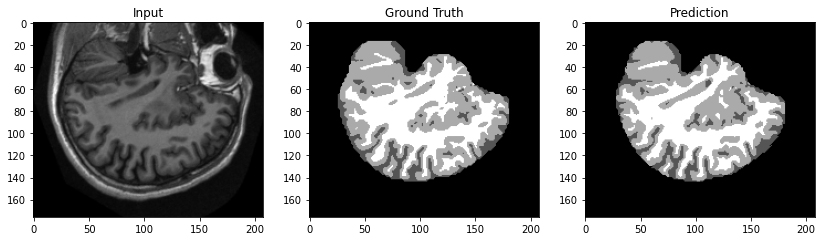

In [21]:
plt.figure(figsize=(14, 14))
plt.subplot(131)
plt.title('Input')
plt.imshow(test_brain[0][0], cmap=plt.cm.gray)
plt.subplot(132)
plt.title('Ground Truth')
plt.imshow(test_mask[0][0], cmap=plt.cm.gray)
plt.subplot(133)
plt.title('Prediction')
#response = json.loads(result)
plt.imshow(np.array(result), cmap=plt.cm.gray)

